In [ ]:
import config
import torch.optim as optim
from custom_models.YOLOv3.model import YOLOv3
from tqdm import tqdm
from custom_models.YOLOv3.utils import (
    mean_average_precision,
    cells_to_bboxes,
    get_loaders,
    check_class_accuracy,
    get_evaluation_bboxes
)
import os
import torch
from custom_models.YOLOv3.loss import YoloLoss
loss_fn = YoloLoss()
import warnings
from torch_version.utils import get_evaluation_bboxes
warnings.filterwarnings("ignore")

In [ ]:
train_loader, test_loader, train_eval_loader,test_data = get_loaders(
    train_csv_path=config.DATASET + "/train.csv", test_csv_path=config.DATASET + "/test.csv"
)

In [ ]:
num_classes = 20
model = YOLOv3(num_classes=num_classes)
model.load_state_dict(torch.load("/home/deepanshu/Desktop/ERAV1/session13/lightning_version/Final_trained_model.pth"))

<All keys matched successfully>

In [ ]:
model.to("cpu")
import config

check_class_accuracy(model, test_loader, threshold=0.45)


100%|██████████| 1298/1298 [00:00<00:00, 2129138.28it/s]

Class accuracy is: 82.999725%
No obj accuracy is: 96.828300%
Obj accuracy is: 76.898473%


In [ ]:
import config
pred_boxes, true_boxes = get_evaluation_bboxes(
    test_loader,
    model,
    iou_threshold=0.5,
    anchors=config.ANCHORS,
    threshold=0.7,
)
mapval = mean_average_precision(
    pred_boxes,
    true_boxes,
    iou_threshold=config.MAP_IOU_THRESH,
    box_format="midpoint",
    num_classes=config.NUM_CLASSES,
)
print(f"MAP: {mapval.item()}")

100%|██████████| 1298/1298 [00:00<00:00, 3236745.89it/s]

MAP: 0.29939851760864258


,val_loss,lr-Adam,train_loss
epoch,,,
19.0,9.692213,NaN,NaN
NaN,NaN,0.000128,NaN
20.0,NaN,NaN,4.946396
NaN,NaN,0.000128,NaN
20.0,NaN,NaN,5.495823


/home/deepanshu/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


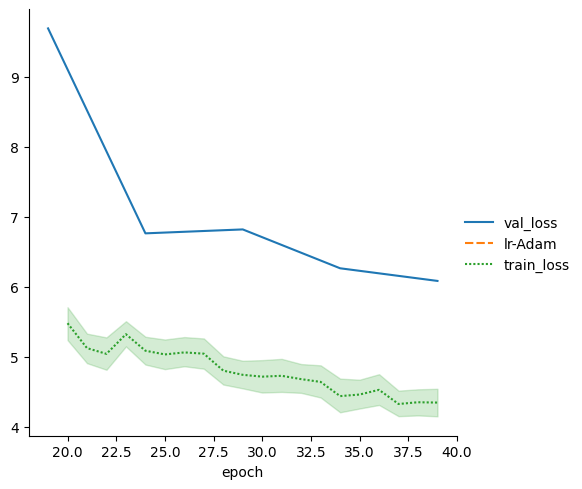

In [3]:
from custom_models.lightning_playground.main import evaluate_performace
evaluate_performace('/home/deepanshu/Downloads/ERAV1/session13/lightning_version/training_logs/resumed_training_2_logs/csv_training_logs/lightning_logs/version_0/metrics.csv')

,lr-Adam,train_loss,val_loss
epoch,,,
NaN,0.000123,NaN,NaN
0.0,NaN,29.265314,NaN
NaN,0.000123,NaN,NaN
0.0,NaN,24.385183,NaN
NaN,0.000123,NaN,NaN


/home/deepanshu/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


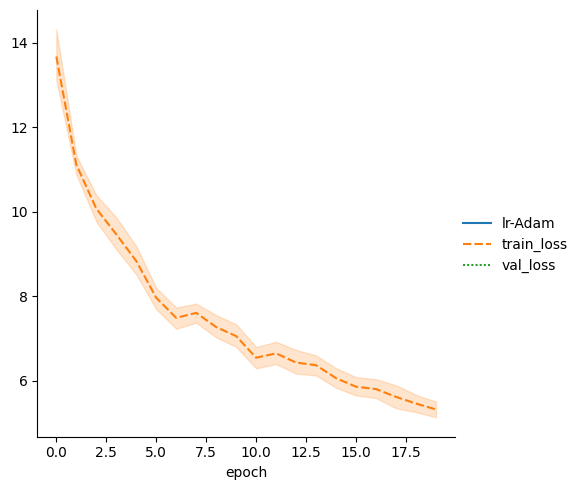

In [4]:
from custom_models.lightning_playground.main import evaluate_performace
evaluate_performace('/home/deepanshu/Downloads/ERAV1/session13/lightning_version/training_logs/training_logs_1/csv_training_logs/lightning_logs/version_0/metrics.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
log_0 = pd.read_csv('/home/deepanshu/Desktop/ERAV1/session13/lightning_version/results/csv_training_logs/lightning_logs/version_0/metrics.csv')
log_1 = pd.read_csv('/home/deepanshu/Desktop/ERAV1/session13/lightning_version/results (1)/results/csv_training_logs/lightning_logs/version_0/metrics.csv')

# using merge function by setting how='inner'
merged_df = pd.concat([log_0, log_1], ignore_index=True)

In [ ]:
merged_df.to_csv("merged_logs.csv")

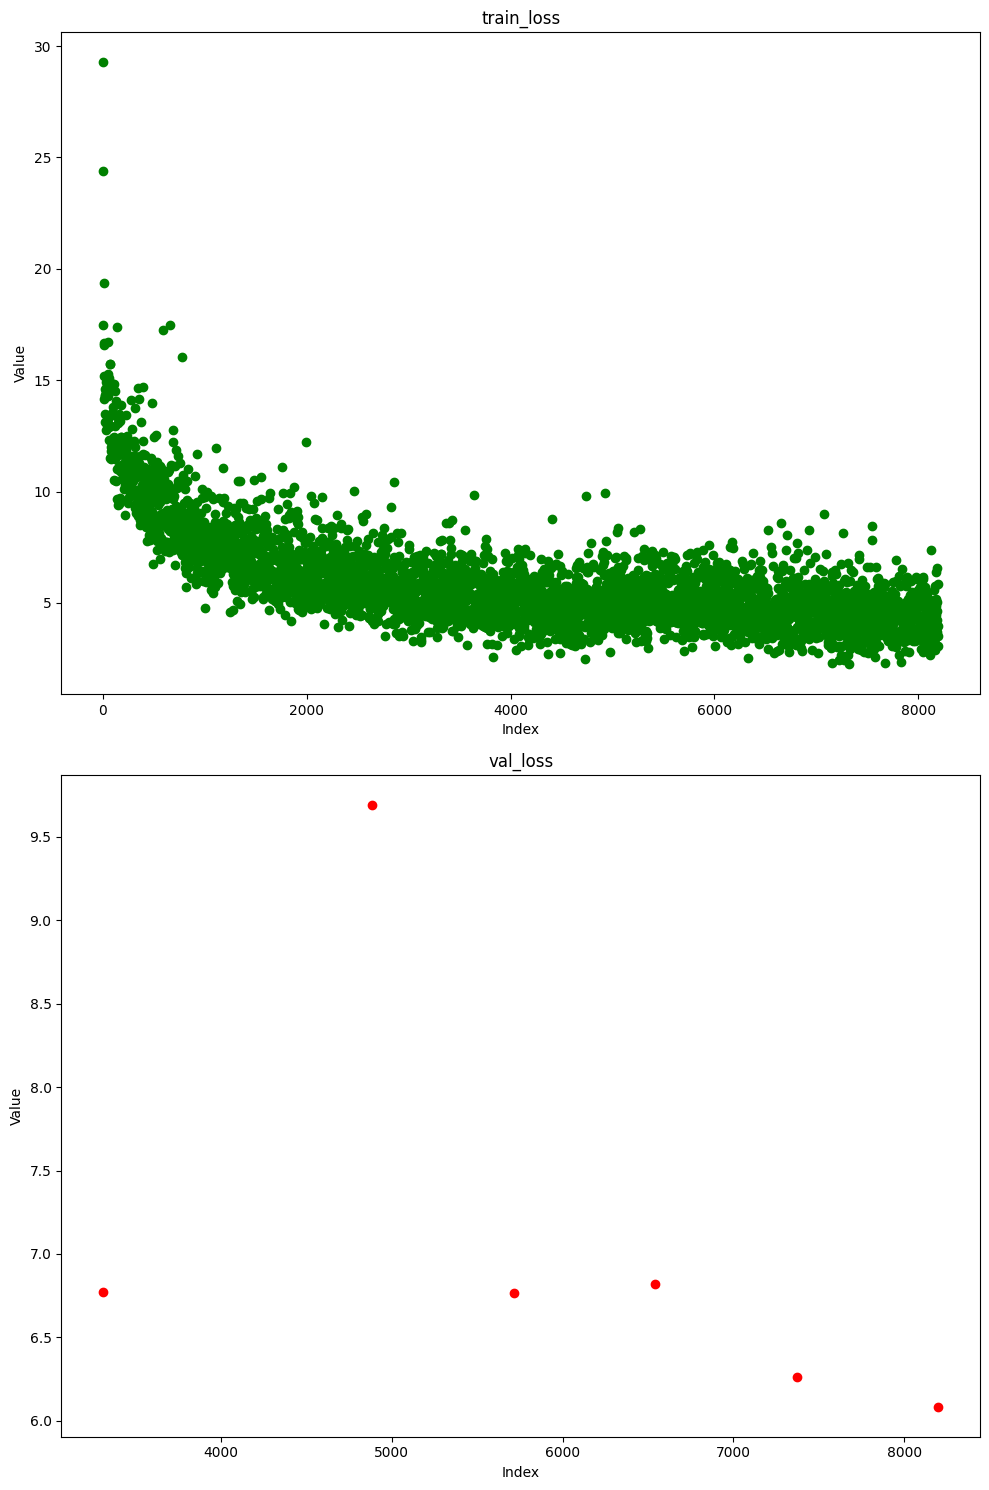

In [ ]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Plot train_loss column
axs[0].plot(merged_df.index, merged_df['train_loss'], marker='o', linestyle='-', color='g')
axs[0].set_title('train_loss')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')

# Plot val_loss column
axs[1].plot(merged_df.index, merged_df['val_loss'], marker='o', linestyle='-', color='r')
axs[1].set_title('val_loss')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()